In [23]:
import json
from pprint import pprint
import os

feature_vector_file_name = "_feature_vector.json"
file_path = f"{os.getcwd()}/data/{feature_vector_file_name}"

with open(file_path) as f:
  data = json.load(f)

pprint(data[:5])

[[0.25, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.5, 6.25],
 [1.75, 3.0, 0.0, 10.0, 3.0, 1.0, 2.0, 1.5, 0.833, 4.428, 9.244],
 [0.75, 4.0, 0.0, 2.0, 1.0, 0.0, 0.666, 0.222, 0.75, 6.125, 11.359],
 [1.25, 4.0, 0.0, 4.0, 3.0, 3.0, 0.5, 0.25, 1.0, 4.3, 9.209],
 [0.25, 4.0, 0.0, 0.0, 2.0, -1.0, 0.0, 0.0, 1.0, 4.142, 10.122]]


In [24]:
from sklearn.cluster import AffinityPropagation,MeanShift,DBSCAN,OPTICS,estimate_bandwidth
import numpy as np

data = np.array(data)

method = "AffinityPropagation"
method = "MeanShift"
method = "DBSCAN"
# method = "OPTICS"

if method == "AffinityPropagation":
  # TODO: シルエットスコアで調節した結果を評価するといいらしいとChatGPTが言ってた
  # preference
  # -200は細かいかなって感じ
  # -400がまあって感じ
  # -800はやりすぎかなって感じ
  # damping
  clustering_result = AffinityPropagation(
      random_state=5,
      preference=-200,
      damping=0.9
    ).fit_predict(data)
elif method == "MeanShift":
  bw = estimate_bandwidth(data, quantile=0.05, n_samples=500)
  print("bw",bw)
  clustering_result = MeanShift(
      bandwidth=bw
    ).fit_predict(data)
elif method == "DBSCAN":
  # init eps = 0.5, min samples=5
  import numpy as np
  from sklearn.neighbors import NearestNeighbors
  import matplotlib.pyplot as plt

  def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):
      nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

      # For each point, compute distances to its k-nearest neighbors
      distances, indices = nbrs.kneighbors(X) 

      distances = np.sort(distances, axis=0)
      distances = distances[:, k-1]

      # Plot the sorted K-nearest neighbor distance for each point in the dataset
      plt.figure(figsize=(8,8))
      plt.plot(distances)
      plt.xlabel('Points/Objects in the dataset', fontsize=12)
      plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
      plt.grid(True, linestyle="--", color='black', alpha=0.4)
      plt.show()
      plt.close()

  k = 2 * len(data[0]) - 1 # k=2*{dim(dataset)} - 1
  # get_kdist_plot(X=data, k=k)
  clustering_result = DBSCAN(eps=2, min_samples=2).fit_predict(data)
elif method == "OPTICS":
  clustering_result = OPTICS(
      min_samples=5,
      max_eps=np.inf,
      cluster_method="xi",
      xi=0.1,
    ).fit_predict(data)

print("dat shape; col:", len(data)," row:", len(data[0]))
print(len(clustering_result))
print(clustering_result)
clustering_labels = set(clustering_result)
print(len(clustering_labels),clustering_labels)

dat shape; col: 348  row: 11
348
[-1 -1 -1 -1  0  0  0  0  0 -1  1  0  0  0 -1  2 -1  0  0 -1  0  0  3  0
  0  0  0  0  0  0  0 -1 -1  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  4 -1  0  0  4 -1
  5  5  5  5  5 -1  5  5  5  5  6 -1 -1  0  0  0  0  0  0  0  0  7  7  7
  5  8  8  8  9  9  9  9  9  0 10 11 -1 -1 10 11  0 -1 -1  0  0  0 -1 -1
  9  0  0  0  3 12  0  0  3 -1 -1  9 13 14 13  0  0  0  9  9 14  3 12  0
  0  3 12  0  0 -1 -1 13 14 13  0  0  0  9  9 15 -1 -1 -1  0 -1 -1  0 16
  0  0 -1  0  0  0 14 -1 -1 -1  0 12 12  0  0 17  0  0  9 12  0  0  0 -1
 -1 -1 -1  0 12 -1  0  0  0  0  0 -1 12  0  0 -1  9  0 18 18  0  0  0 -1
 -1 19 15  0  0  0  9  9 -1 -1 19 15  0  0  0  9  9 15 -1 -1 -1 -1 15  6
 17  6  0  6 17 20 20  5  0  0  5  0  0  0  0 -1  5 -1  0  0  0 12  0  0
  0  9 -1  0  2 -1 -1 -1 -1  0 -1  0 12  0  0  0 12  0  0 -1 21 21  0 -1
 -1 -1 -1  0  0  0  0 14  0  0  0  5  5 14 14 -1  1 12 16  0  0 12 16  0
  0 -1  0  0  0 22

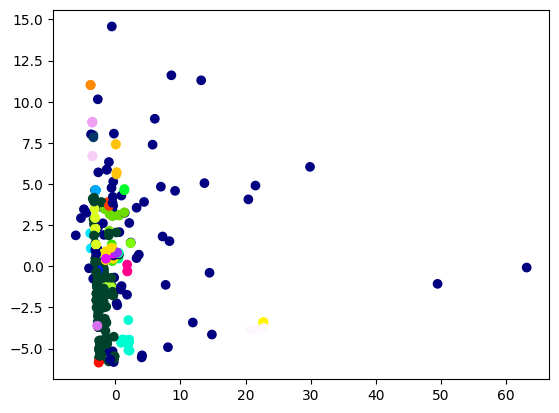

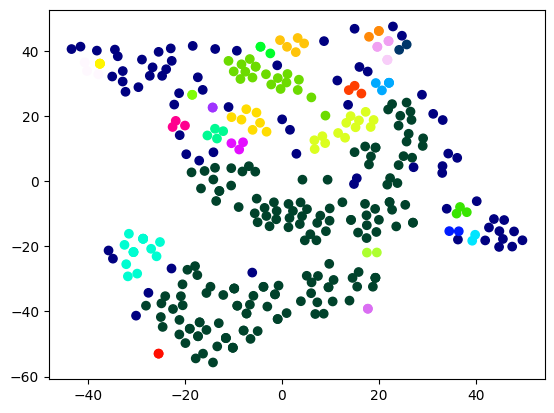

array([[ 4.8426795 ,  9.664574  ],
       [ 4.397028  ,  6.4111466 ],
       [ 3.5112302 , 10.945648  ],
       [ 3.2889624 , 10.578851  ],
       [ 3.6502767 , 11.448637  ],
       [ 3.8978434 , 15.049687  ],
       [ 4.494718  , 11.997728  ],
       [ 3.8339462 , 15.125618  ],
       [ 5.976917  , 12.465334  ],
       [ 7.4042397 , 12.8076105 ],
       [-0.7984798 ,  7.859312  ],
       [ 4.350291  , 14.405635  ],
       [ 4.4195766 , 11.991499  ],
       [ 4.368601  , 14.381452  ],
       [-0.7585605 ,  7.8057184 ],
       [ 7.205202  , 12.850339  ],
       [ 4.528769  ,  6.2856617 ],
       [ 5.662446  , 12.969211  ],
       [ 6.187455  ,  9.47912   ],
       [ 4.1069818 ,  6.3482    ],
       [ 5.680727  , 13.003582  ],
       [10.646866  , 12.971555  ],
       [ 2.8334625 , 10.941525  ],
       [14.478113  , 10.287098  ],
       [14.882545  , 11.951521  ],
       [14.850951  , 11.9220705 ],
       [ 3.7084513 , 15.284234  ],
       [16.276602  , 10.349103  ],
       [14.534993  ,

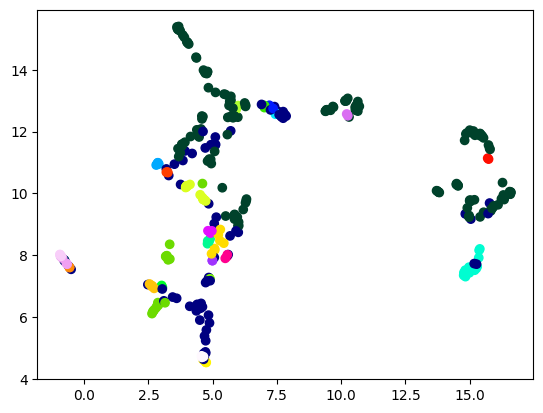

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import datetime

save_dir_name = "_vis-result"
dir_path = f"./data/{save_dir_name}/"
time_dir_path = dir_path + f"{str(datetime.datetime.today())}/"
try:
    os.mkdir(dir_path)
    os.mkdir(time_dir_path)
except:
    pass

data = np.array(data)
file_explain = f"clustering_{method}_{datetime.datetime.now().time()}"

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
data_pca = pca.fit_transform(data)

plt.scatter(data_pca[:,0],data_pca[:,1], c=clustering_result, cmap="gist_ncar")
plt.savefig(dir_path + f"{file_explain}_plot-pca.png")
plt.show()

tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data)

plt.scatter(data_tsne[:,0],data_tsne[:,1], c=clustering_result, cmap="gist_ncar")
plt.savefig(dir_path + f"{file_explain}_plot-tsne.png")
plt.show()

from umap import UMAP

umap = UMAP(n_components=2, random_state=0)
data_umap = umap.fit_transform(data)
pprint(data_umap)

plt.scatter(data_umap[:,0],data_umap[:,1], c=clustering_result, cmap="gist_ncar")
plt.savefig(dir_path + f"{file_explain}_plot-umap.png")
plt.show()

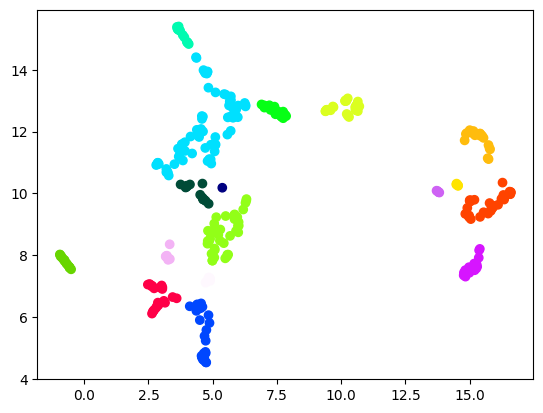

In [26]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):
#     nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

#     # For each point, compute distances to its k-nearest neighbors
#     distances, indices = nbrs.kneighbors(X) 

#     distances = np.sort(distances, axis=0)
#     distances = distances[:, k-1]

#     # Plot the sorted K-nearest neighbor distance for each point in the dataset
#     plt.figure(figsize=(8,8))
#     plt.plot(distances)
#     plt.xlabel('Points/Objects in the dataset', fontsize=12)
#     plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
#     plt.grid(True, linestyle="--", color='black', alpha=0.4)
#     plt.show()
#     plt.close()

from umap import UMAP

umap = UMAP(n_components=2, random_state=0)
data_umap = umap.fit_transform(data)
# pprint(data_umap)


k = 2 * len(data_umap[0]) - 1 # k=2*{dim(dataset)} - 1
# get_kdist_plot(X=data_umap, k=k)
clustering_result = DBSCAN(eps=0.5, min_samples=2).fit_predict(data_umap)

# print("dat shape; col:", len(data)," row:", len(data[0]))
# print(len(clustering_result))
# # print(clustering_result)
clustering_labels = set(clustering_result)
# print(len(clustering_labels),clustering_labels)


import os
import datetime

from section_divide import get_section

notes_file_path = "./data/m155_notes-test.json"

sections = get_section(notes_file_path)


base_dir = "./data/_vis-result/cluster-labels/"
try:
    os.mkdir("./data/_vis-result/")
    os.mkdir(base_dir)
except:
    pass

# for label in clustering_labels:
#     # ラベルが一致するデータのみをフィルタリング
#     # plt.scatter(data_subset[:, 0], data_subset[:, 1], label=str(label))
    
#     dir_path = f"{base_dir}label-{label}/"
#     try:
#         os.mkdir(dir_path)
#     except:
#         pass
#     file_name = f"{str(datetime.datetime.now().time())}"
#     print(file_name)
    
#     data_range = clustering_result == label
#     data_subset = data_umap[data_range]
#     section_subset = [s for s,d in zip(sections,data_range) if d]
    
#     for i,section in enumerate(section_subset):
#         xs = [item["x"] for item in section]
#         ys = [item["y"] for item in section]
#         plt.scatter(xs,ys, color="b", label=label)
#         plt.xlim([-0.3,12.3])
#         plt.savefig(f"{dir_path}{i}_{file_name}.png")
#         plt.close()

# plt.legend()
# plt.xlim(left=-5)
# plt.show()

plt.scatter(data_umap[:,0],data_umap[:,1], c=clustering_result, cmap="gist_ncar")
plt.savefig(dir_path + f"{file_explain}_plot-umap2clustering.png")
plt.show()

=== ノーツ数が4である区間の数，ノーツ数が4である区間のラベルの数，そのラベル
158 13 {0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
=====
3 2


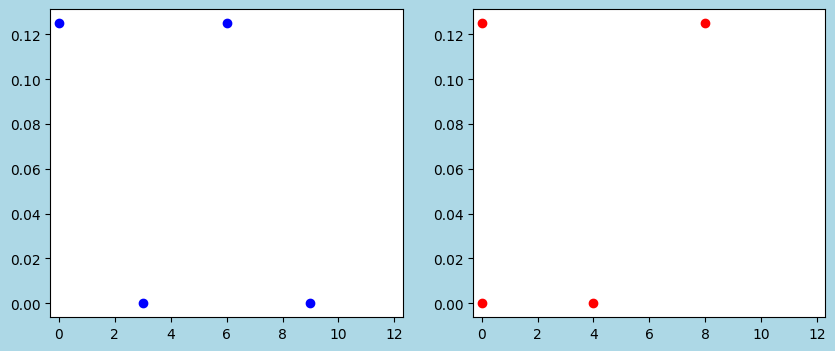

3 2


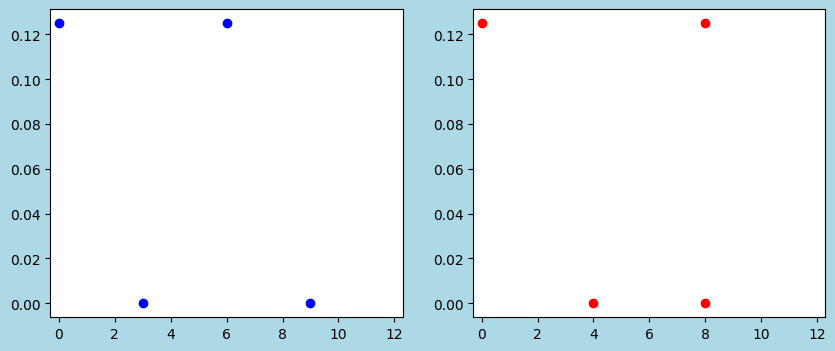

3 2


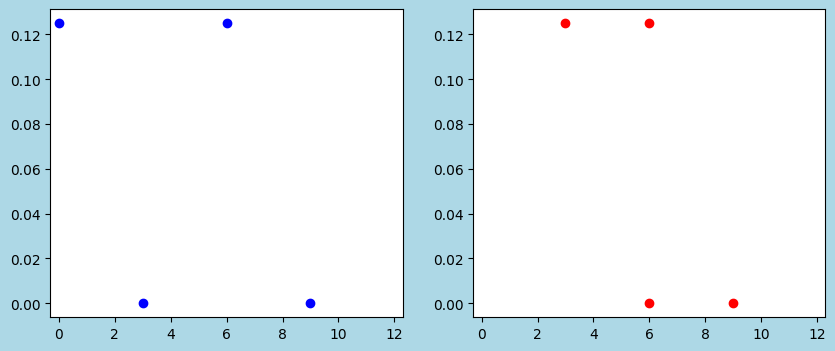

3 6


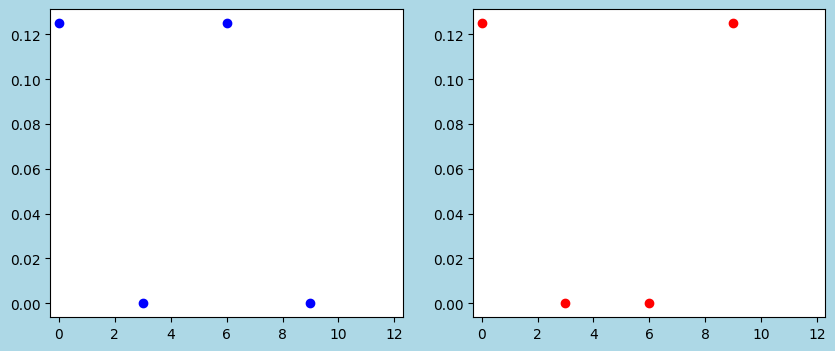

3 2


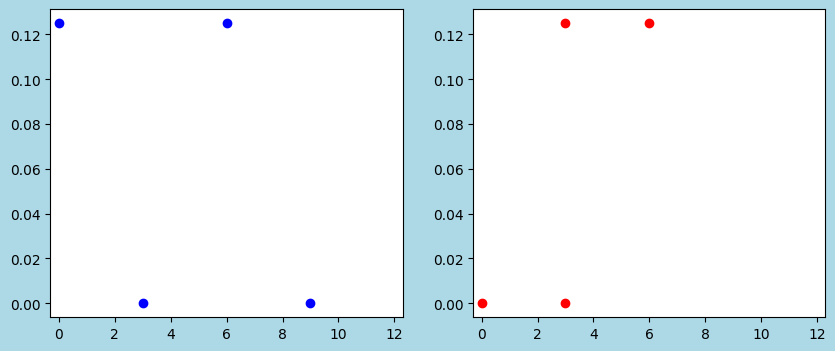

3 7


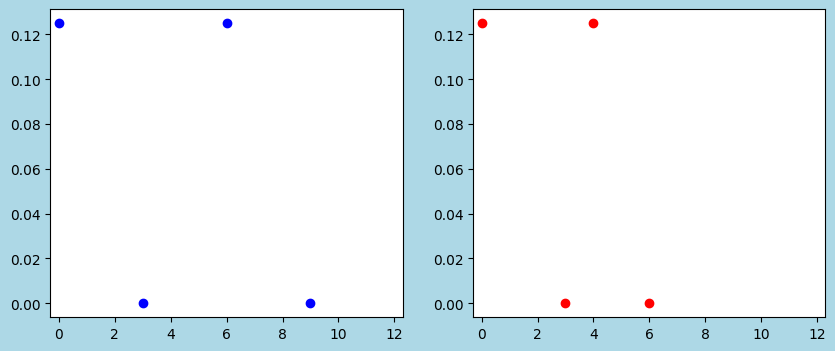

3 2


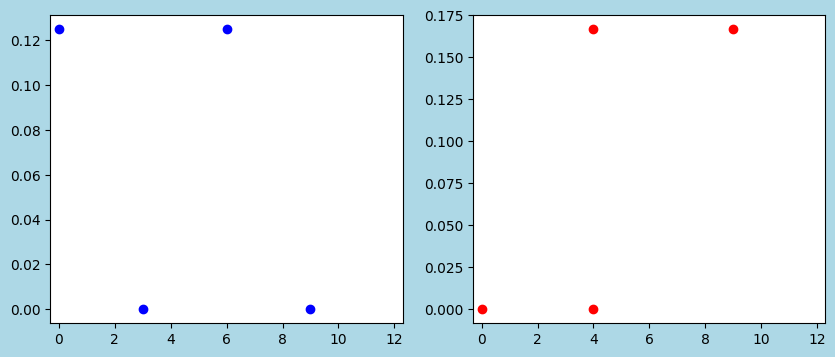

3 8


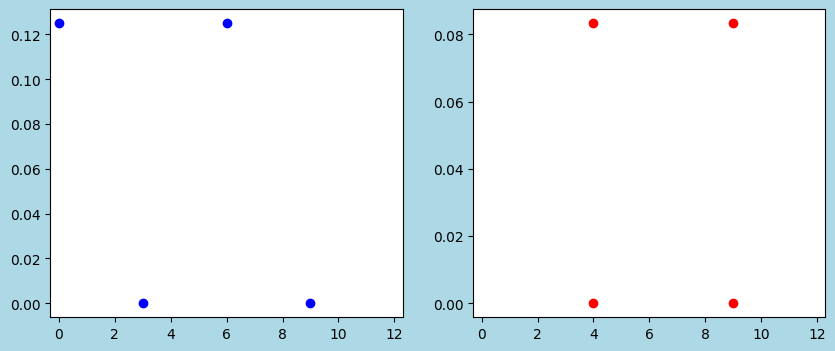

3 9


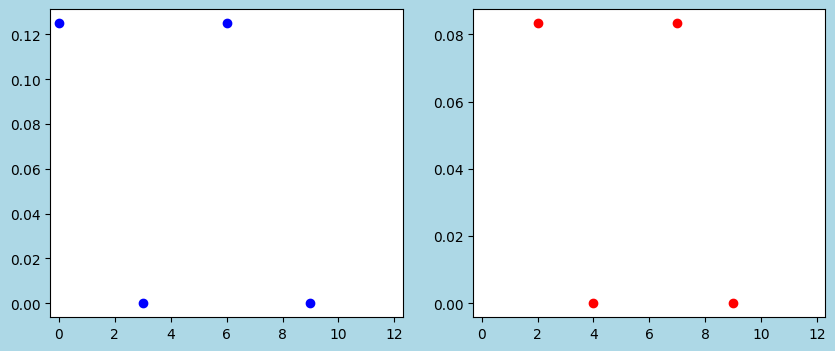

3 9


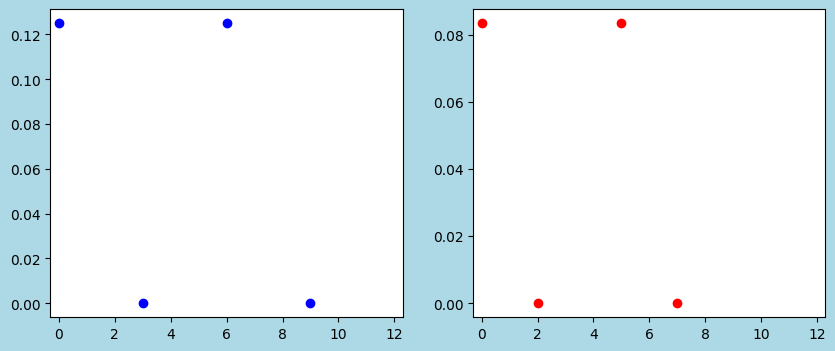

3 10


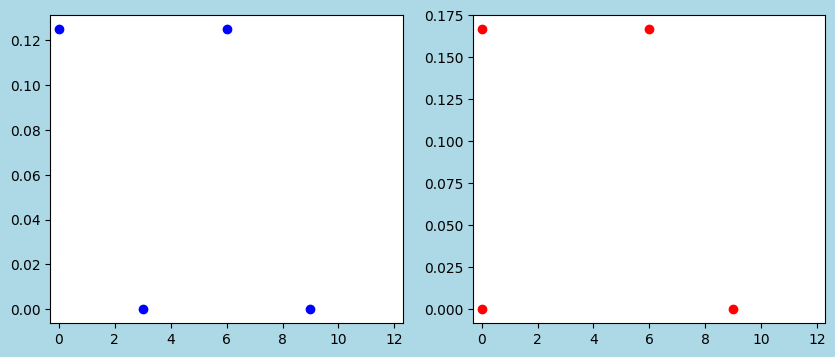

3 8


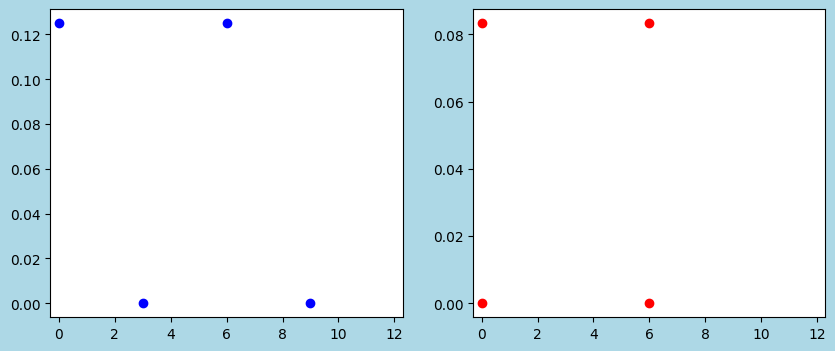

3 9


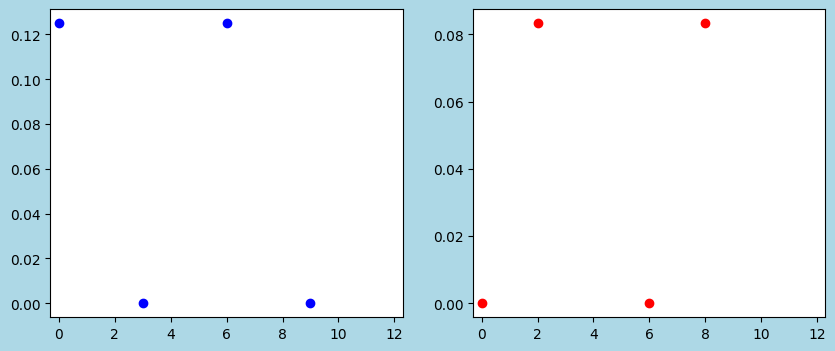

3 9


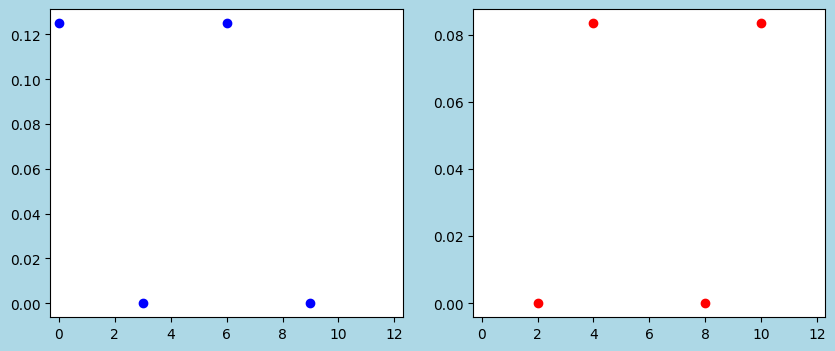

3 6


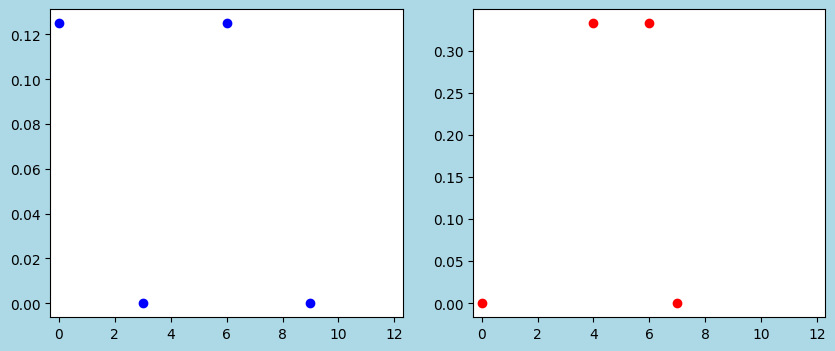

3 6


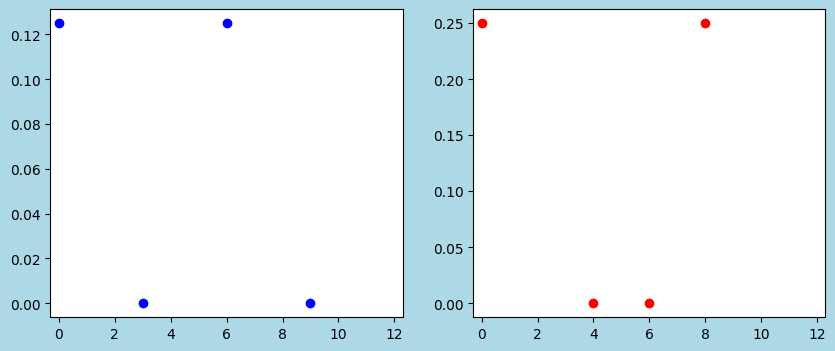

3 10


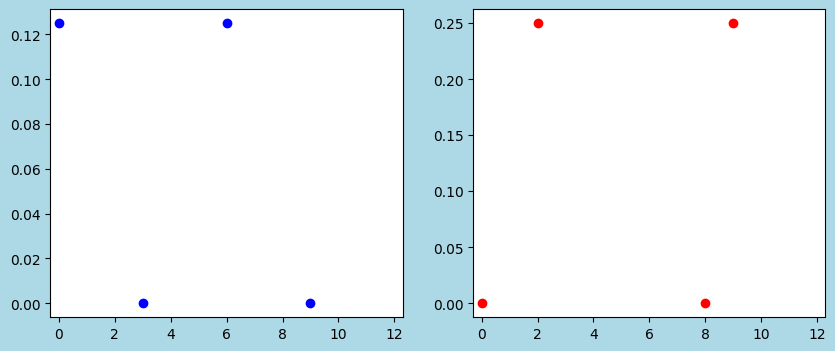

3 9


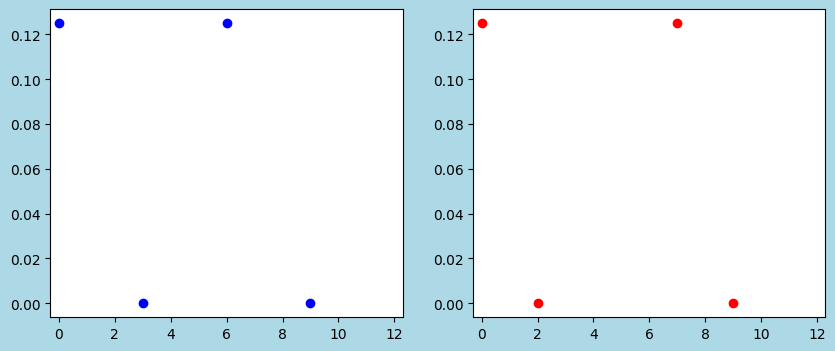

3 9


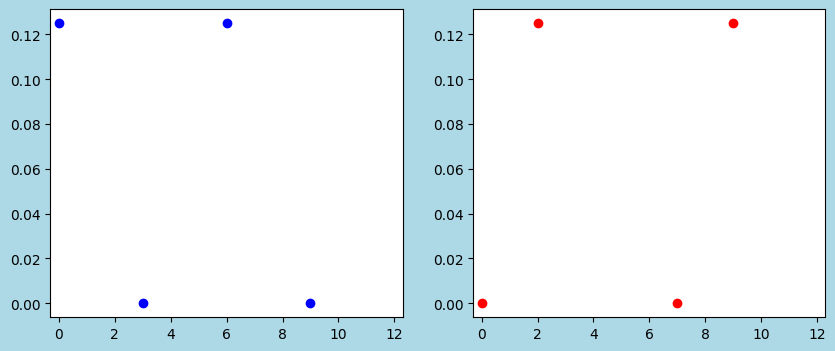

3 9


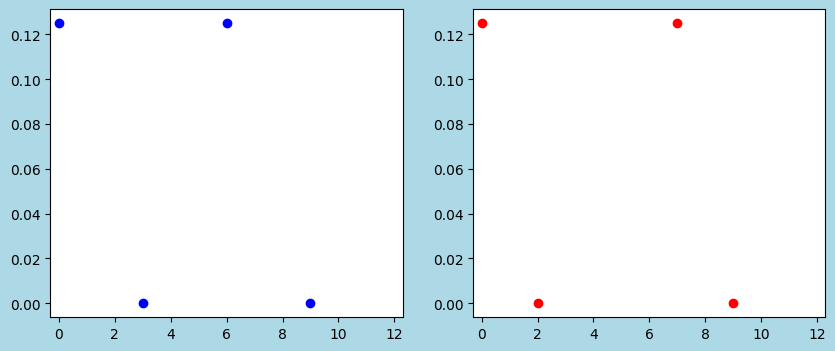

3 9


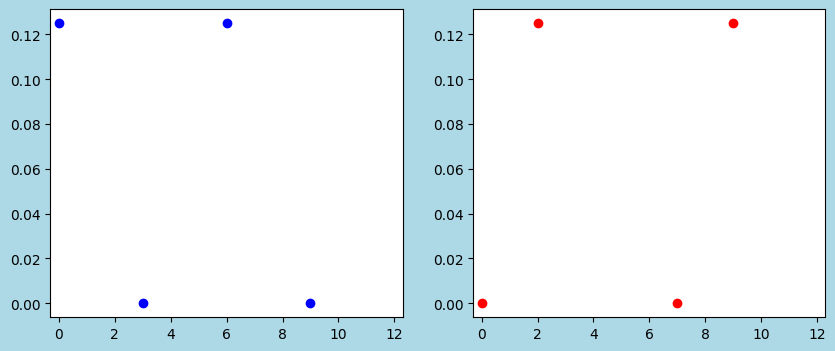

3 9


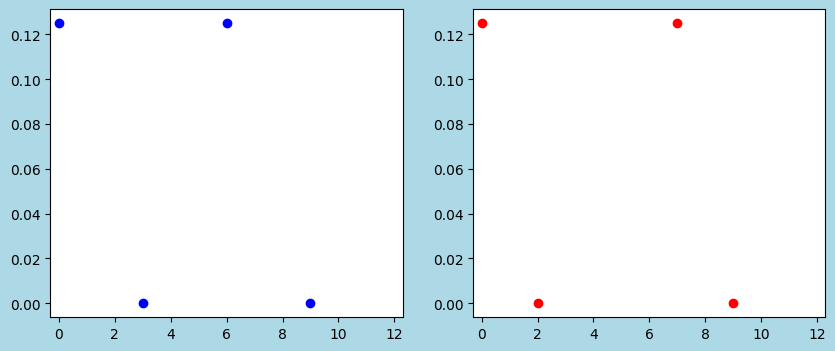

3 9


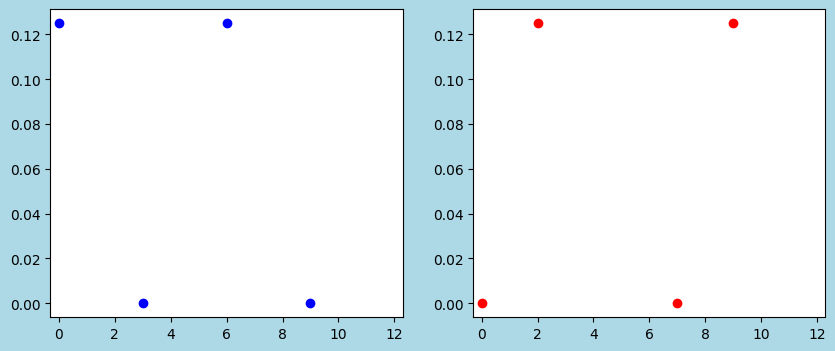

3 9


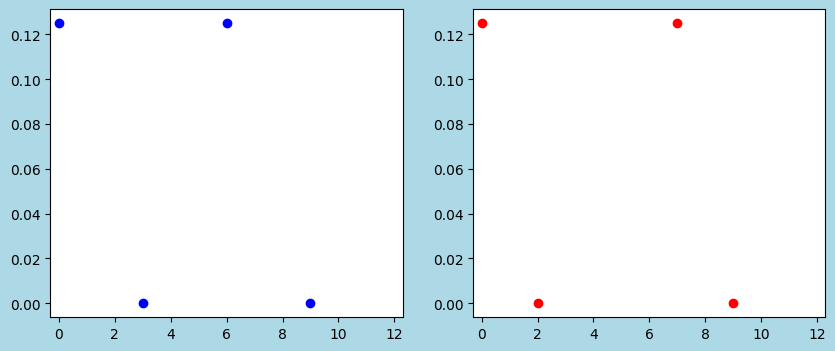

3 10


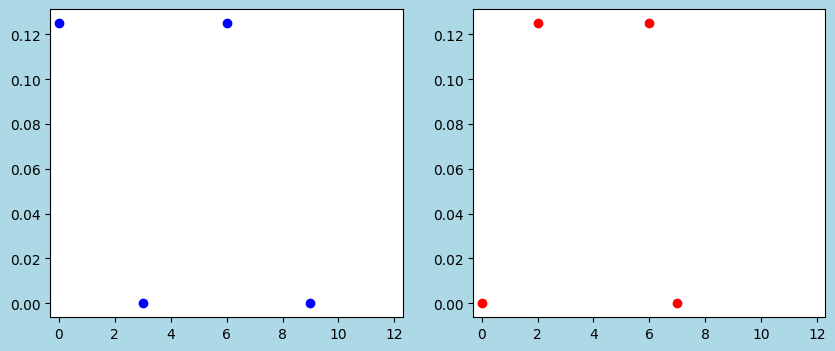

3 6


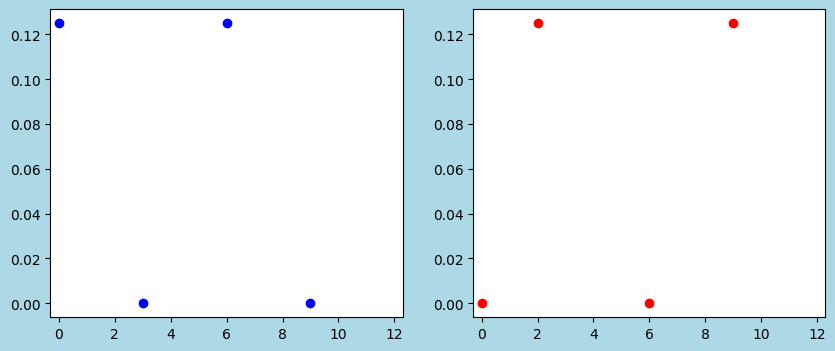

3 10


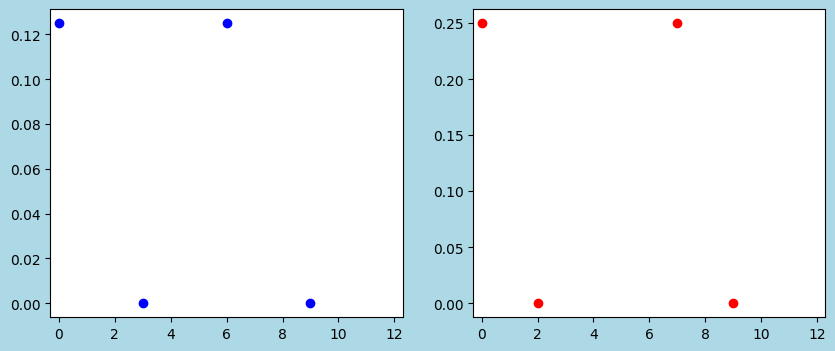

3 10


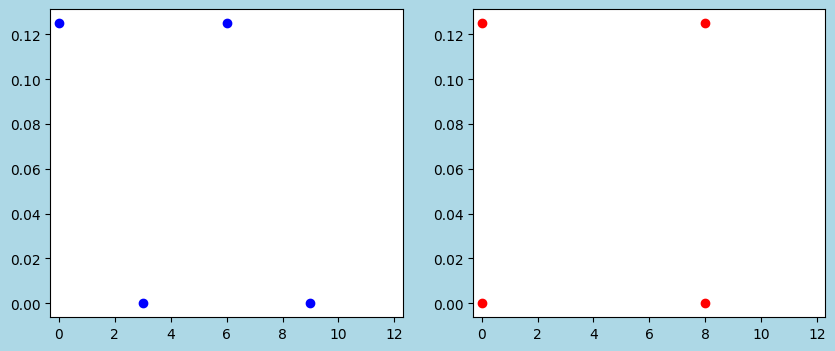

3 6


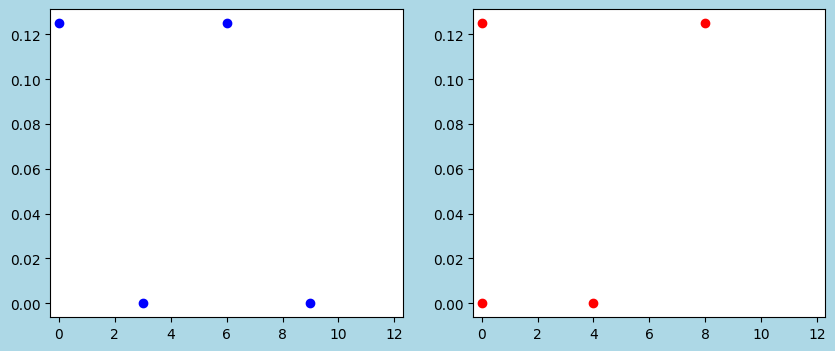

3 12


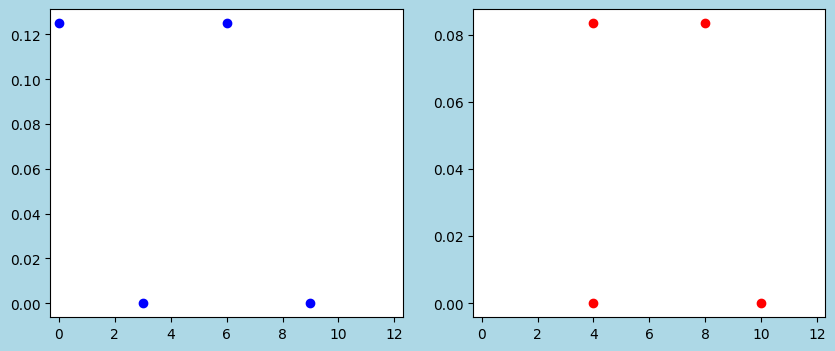

3 12


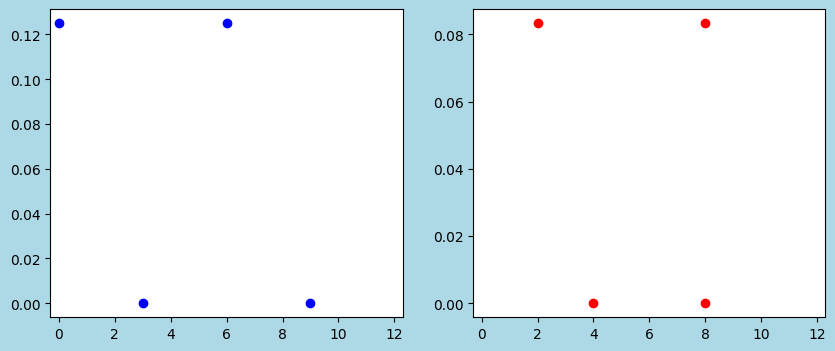

3 12


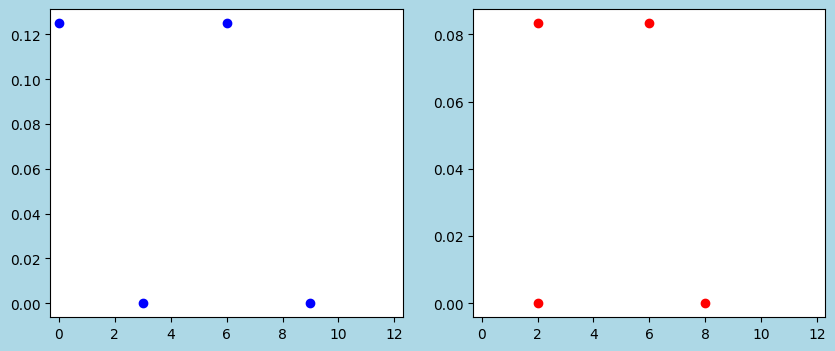

3 12


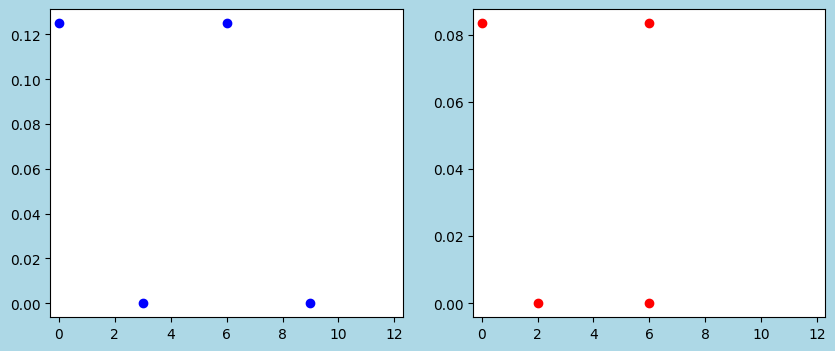

3 12


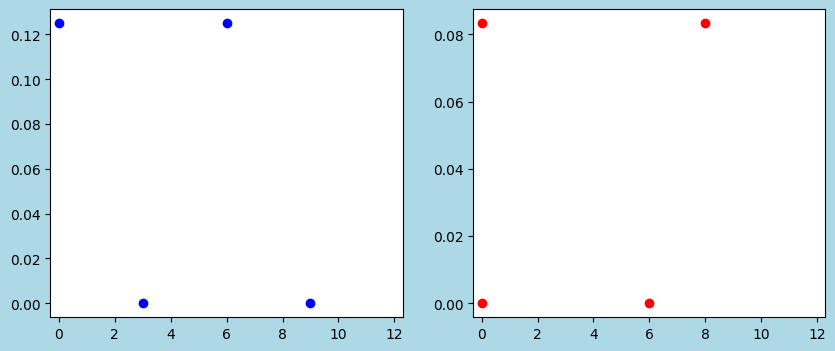

3 6


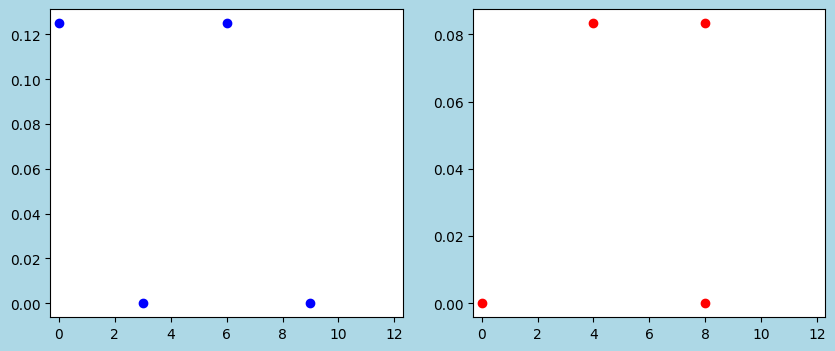

3 12


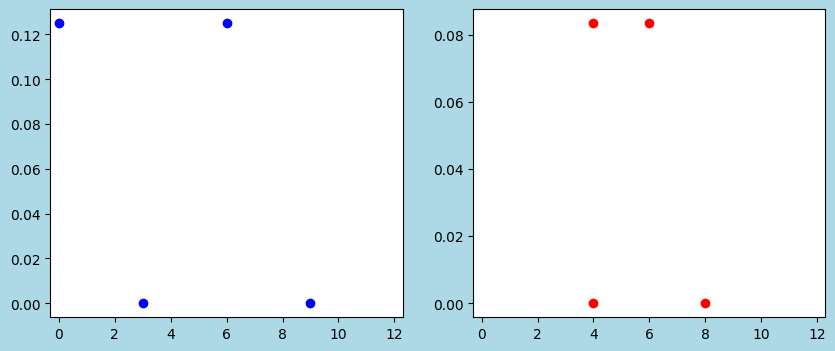

3 12


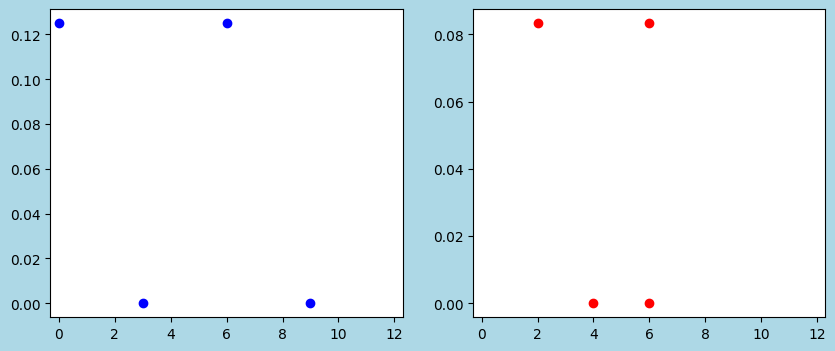

3 12


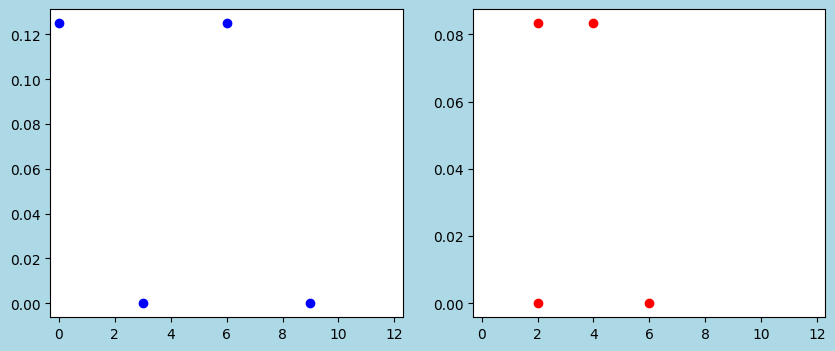

3 12


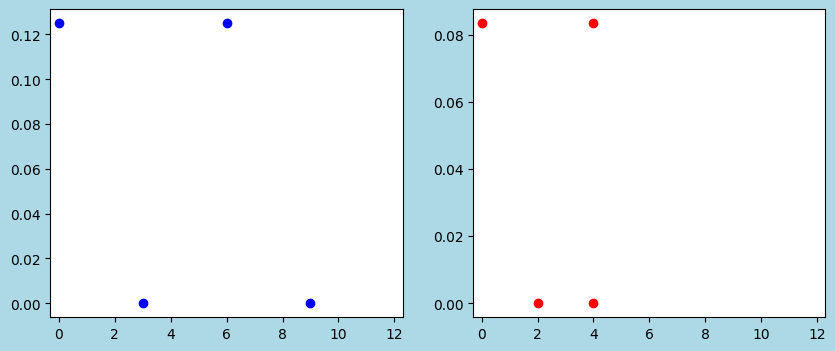

3 6


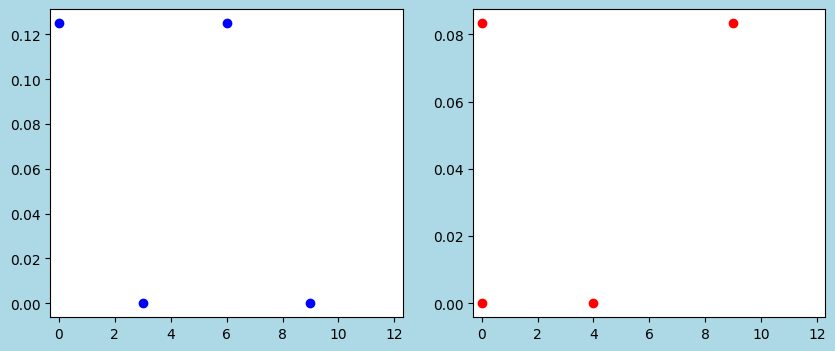

3 10


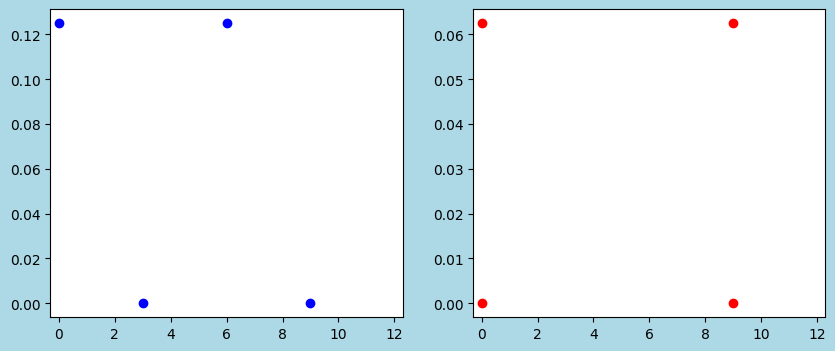

3 6


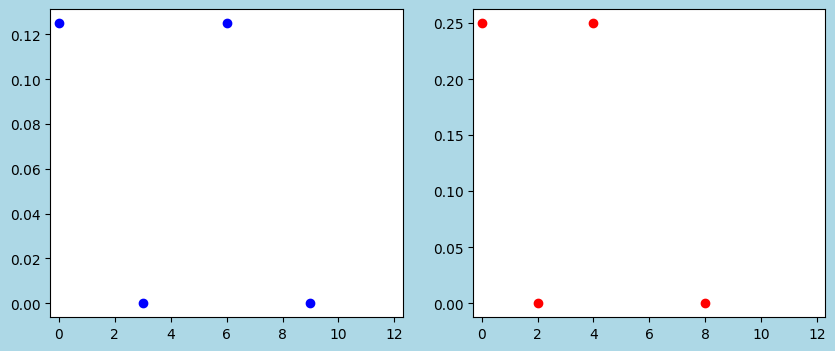

3 13


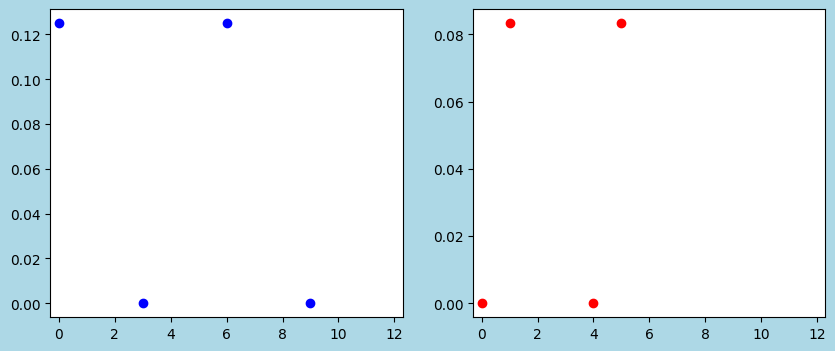

3 13


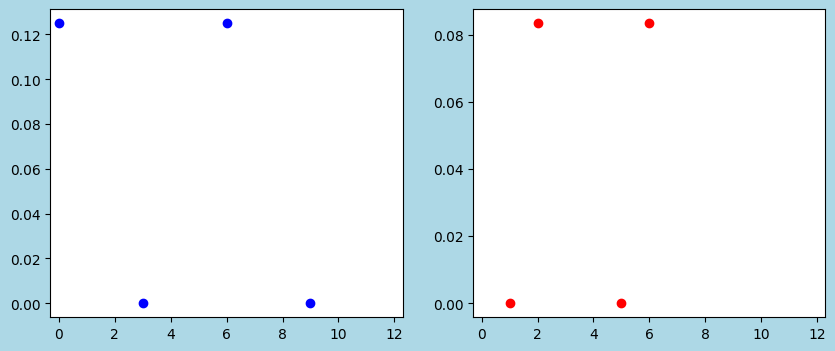

3 13


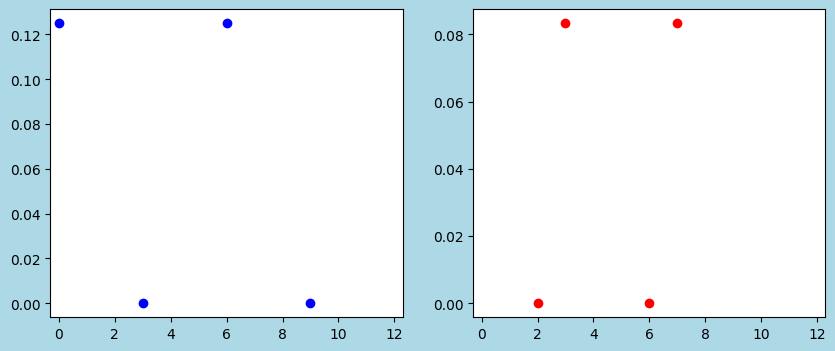

3 9


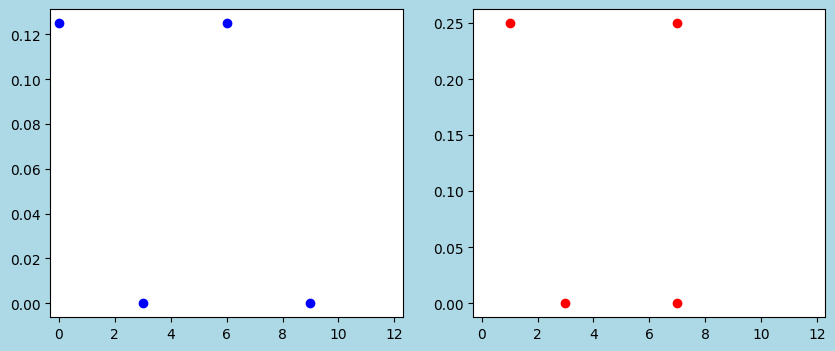

3 8


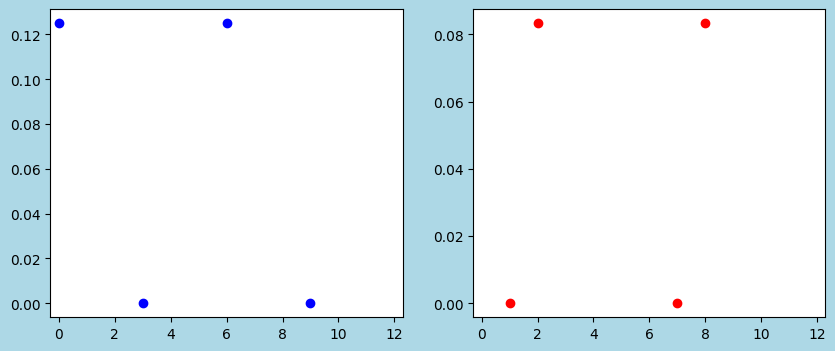

3 8


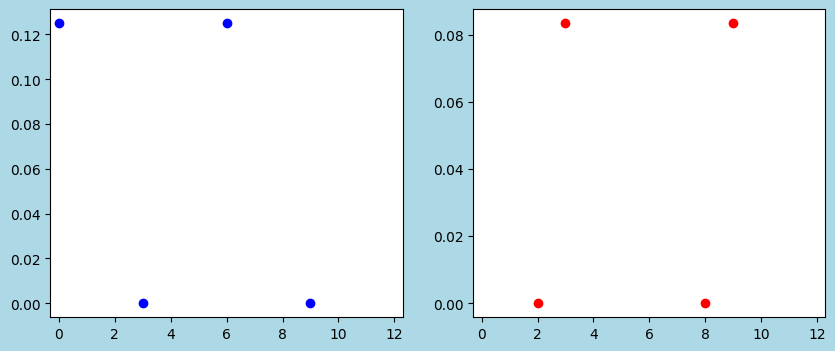

3 10


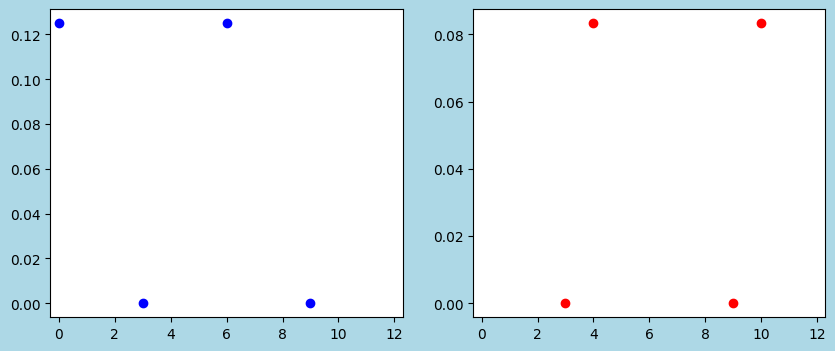

3 14


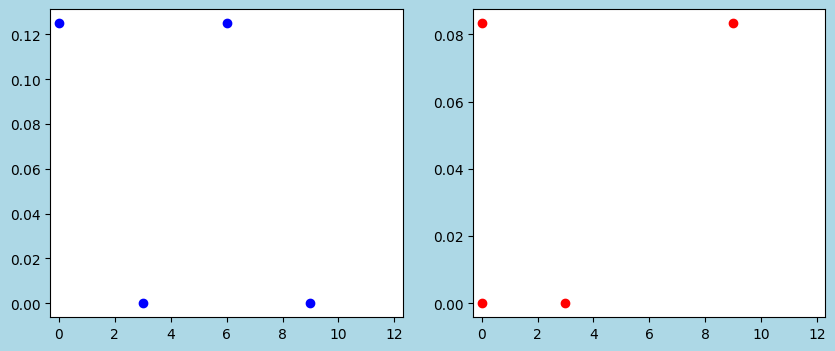

3 14


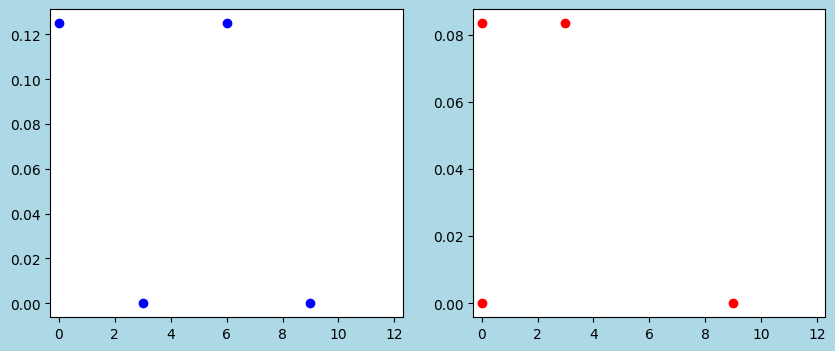

3 14


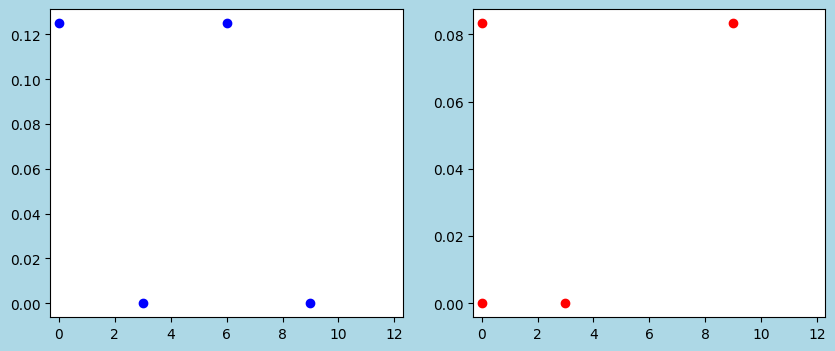

3 14


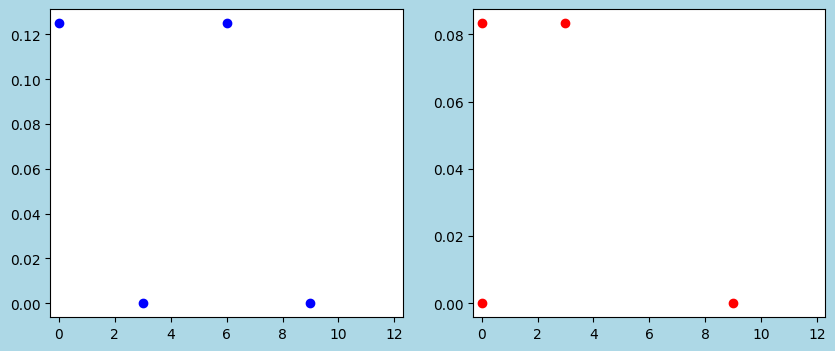

3 14


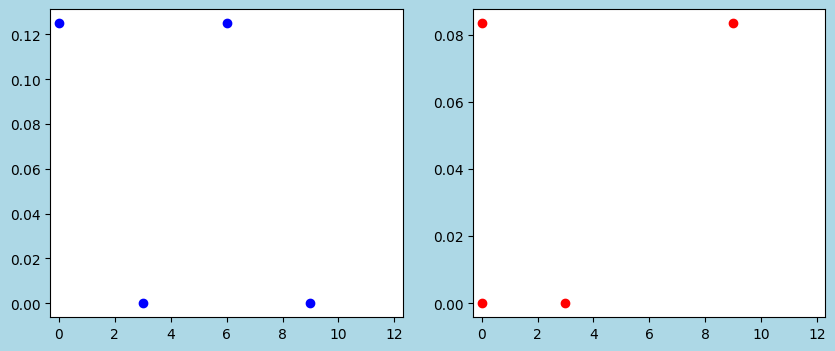

3 6


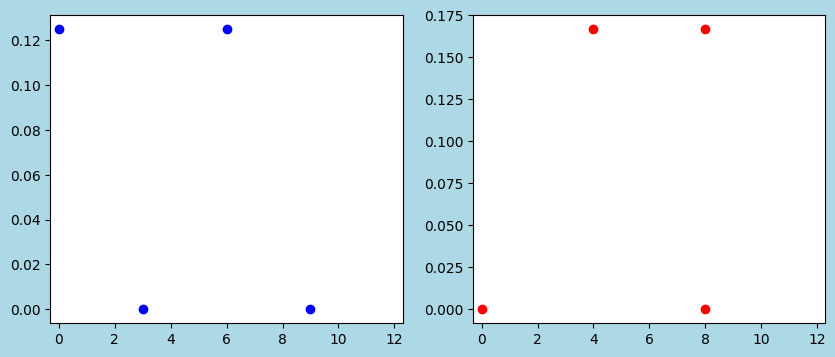

3 6


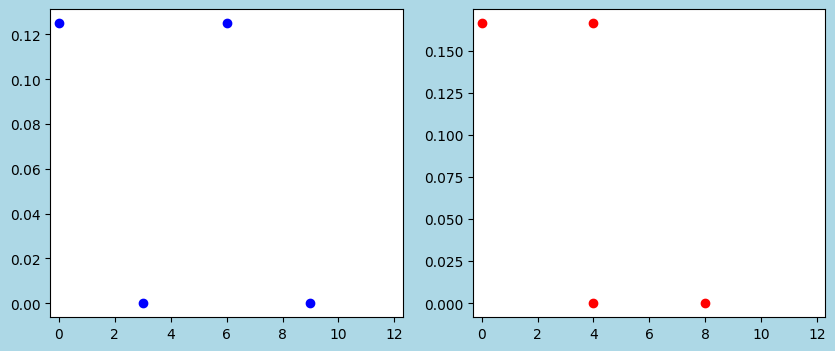

3 6


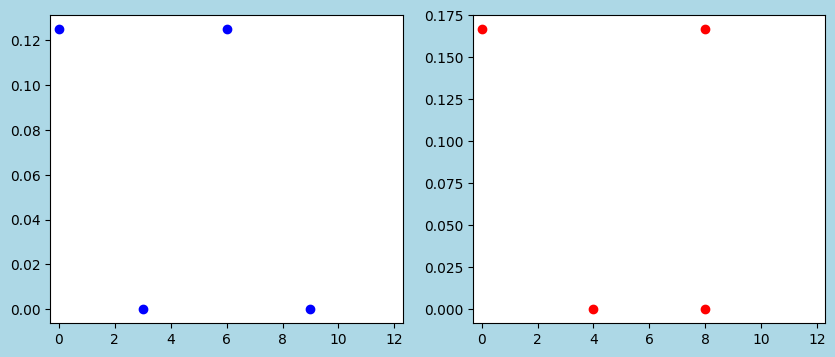

3 10


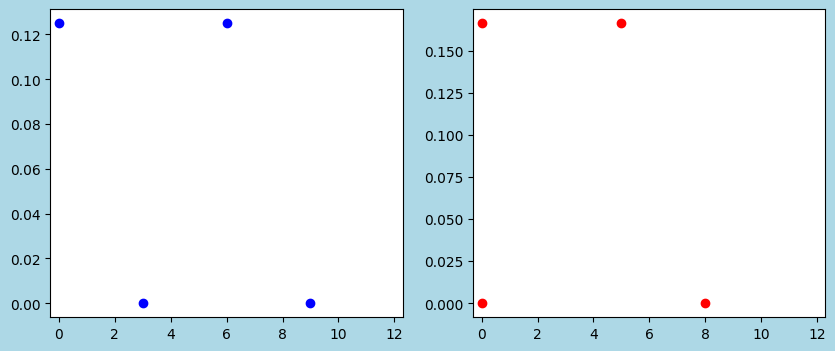

3 9


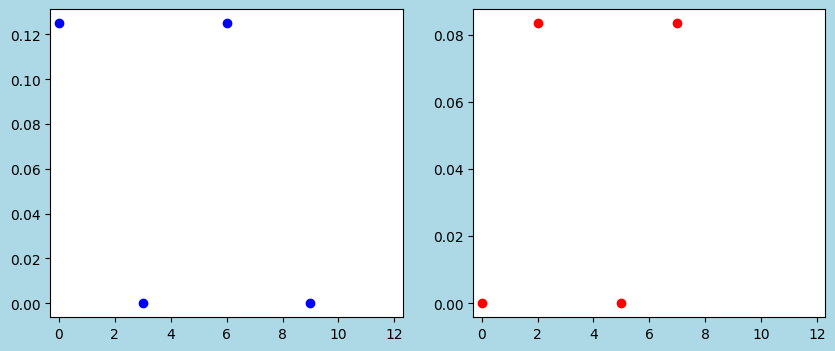

3 14


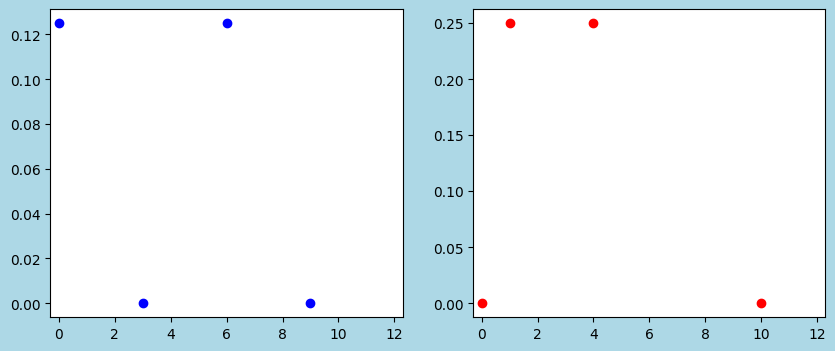

3 10


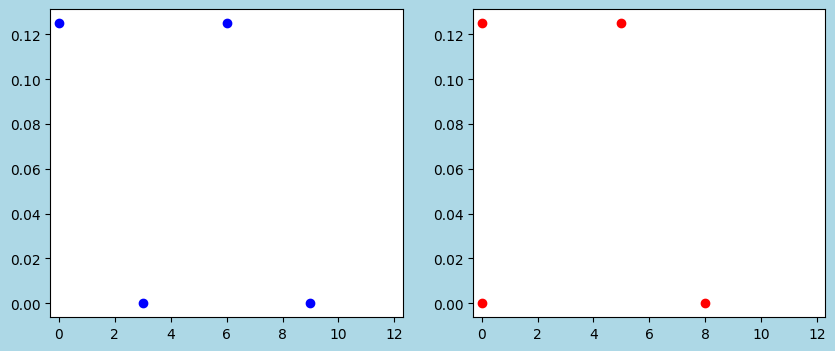

3 10


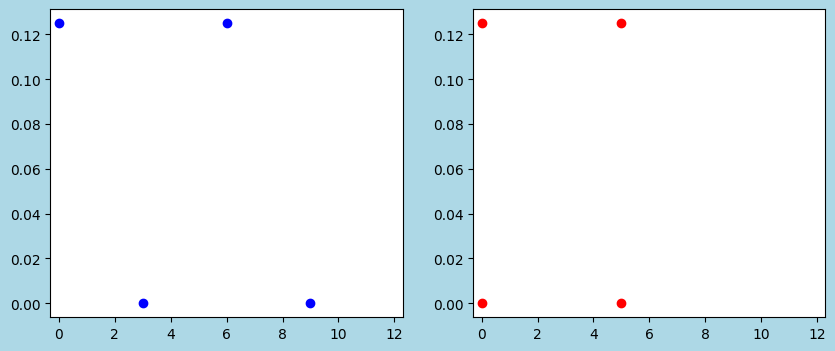

3 2


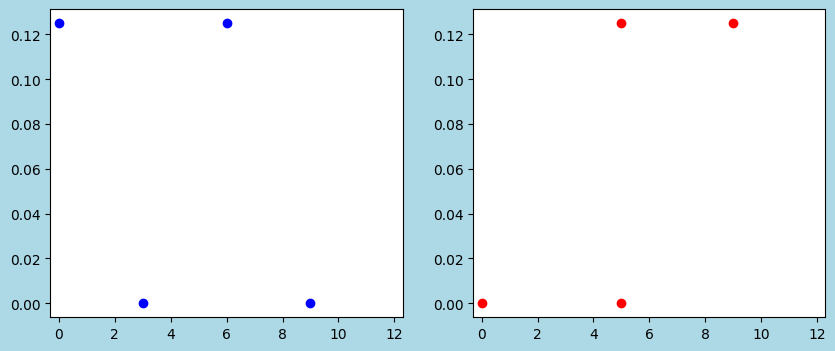

3 0


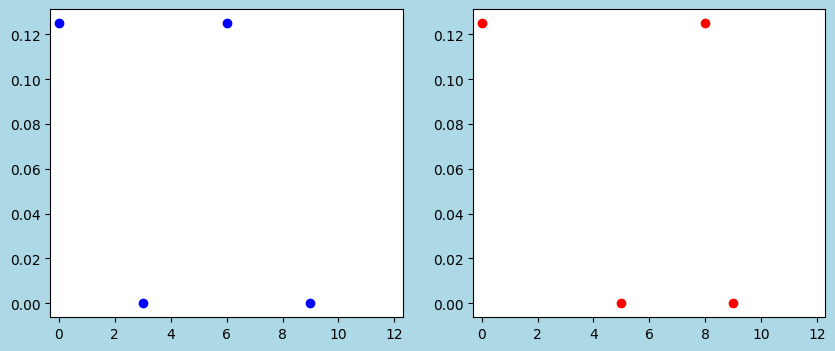

3 10


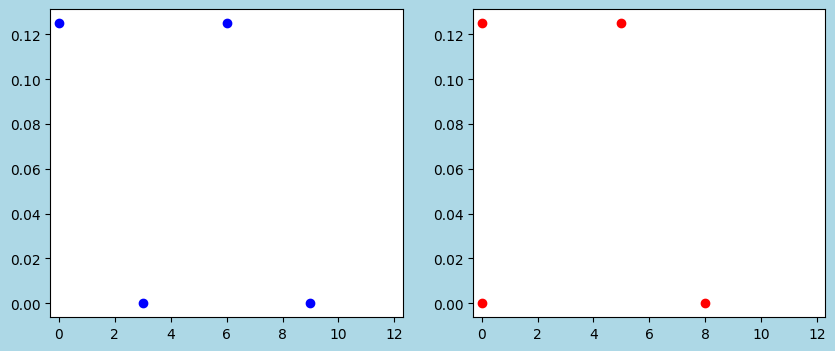

3 10


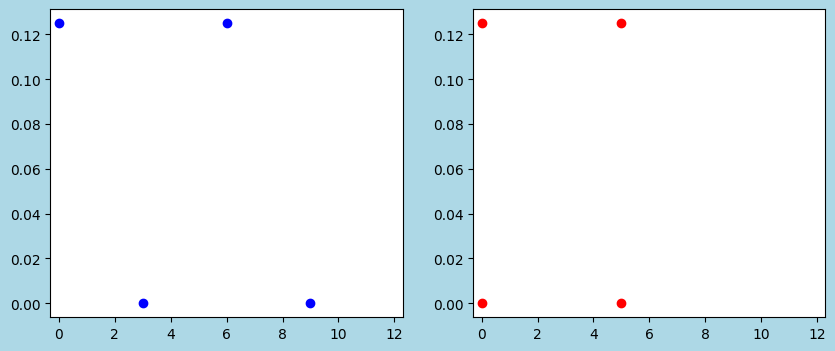

3 2


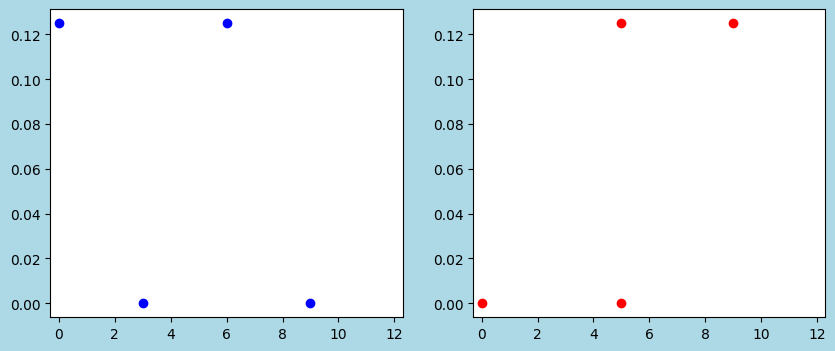

3 0


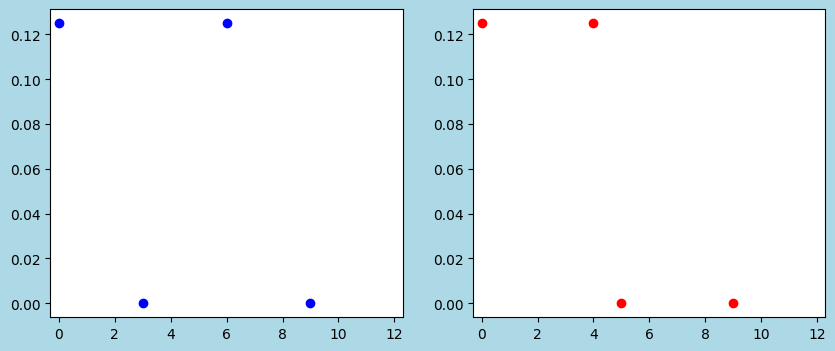

3 14


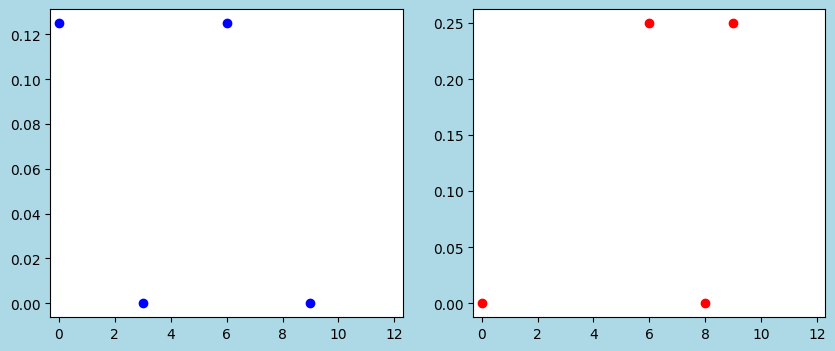

3 6


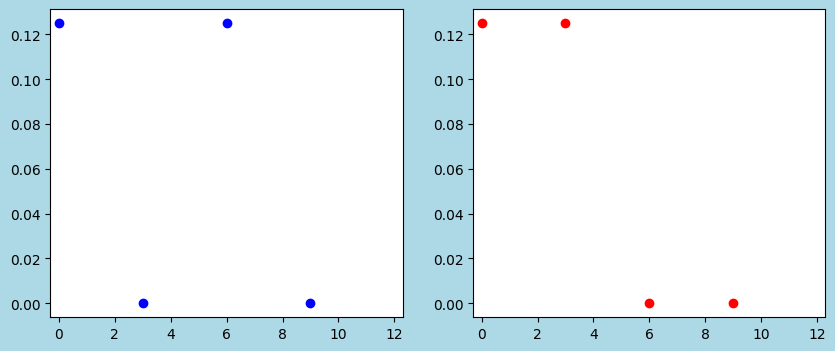

3 2


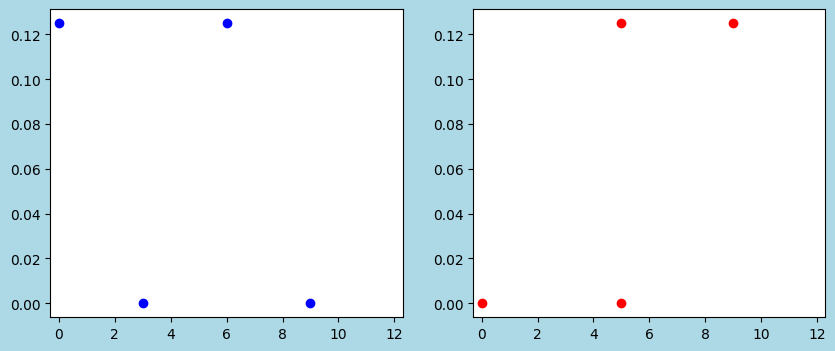

3 0


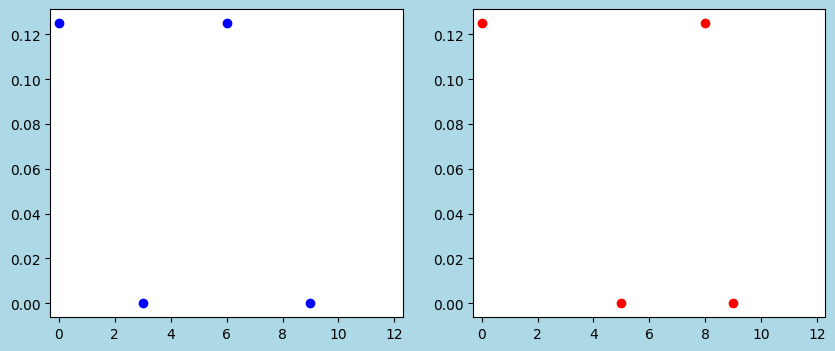

3 10


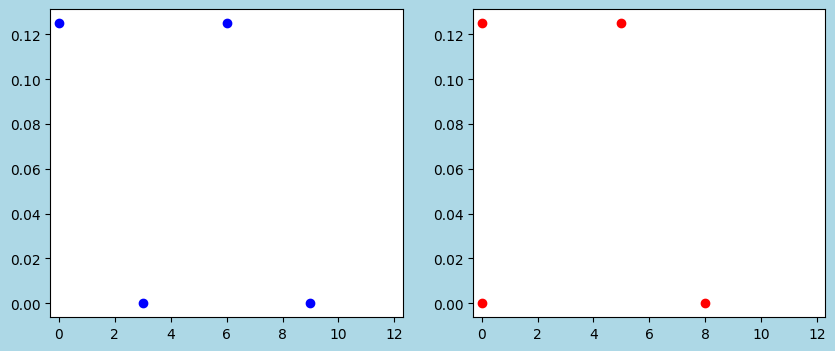

3 10


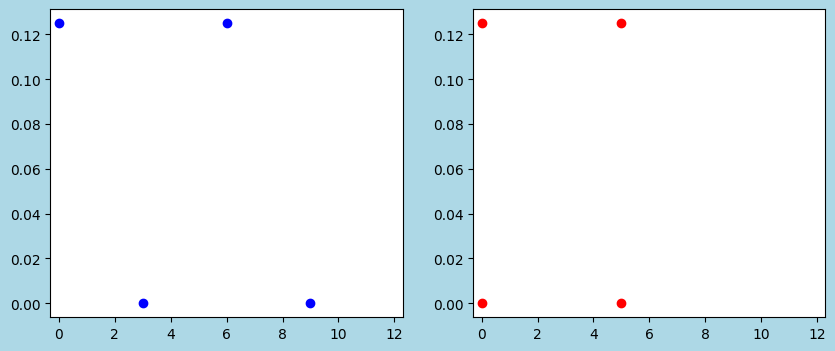

3 2


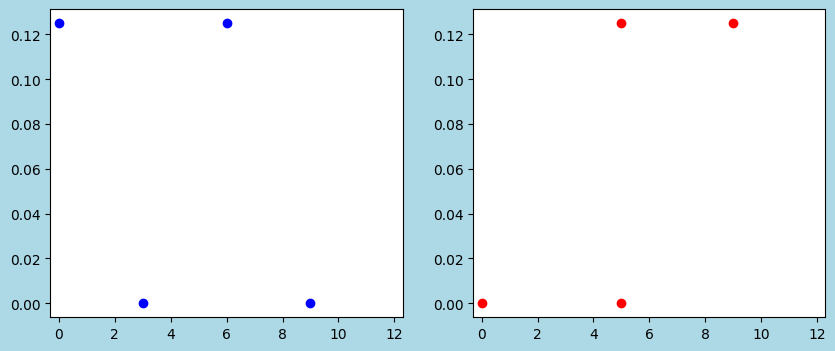

3 0


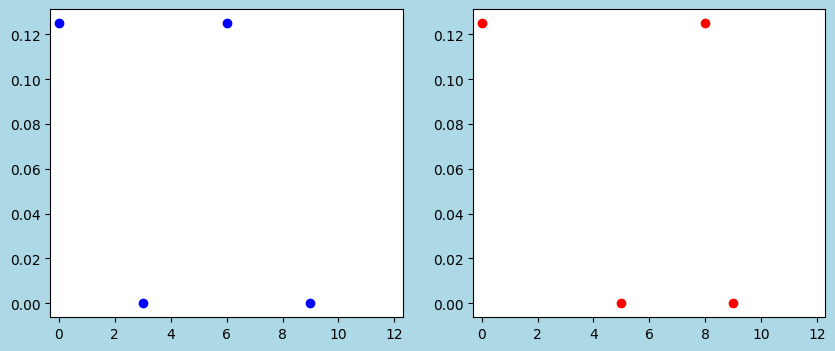

3 10


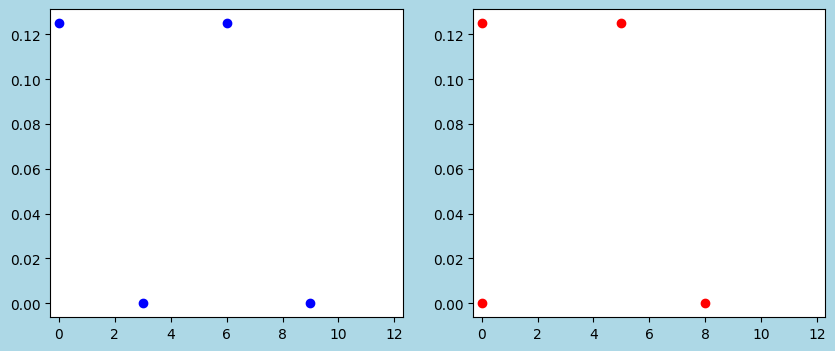

3 10


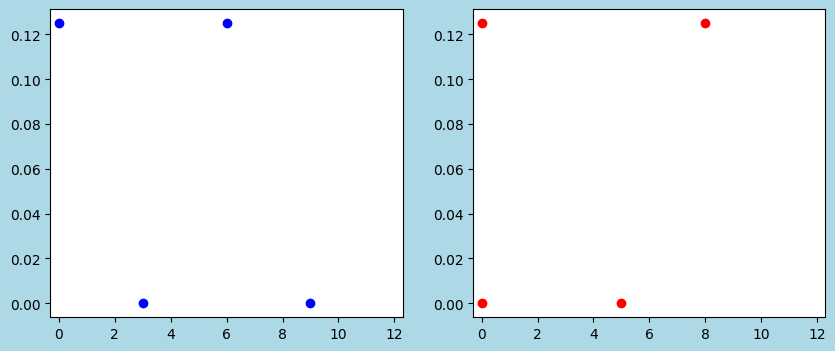

3 10


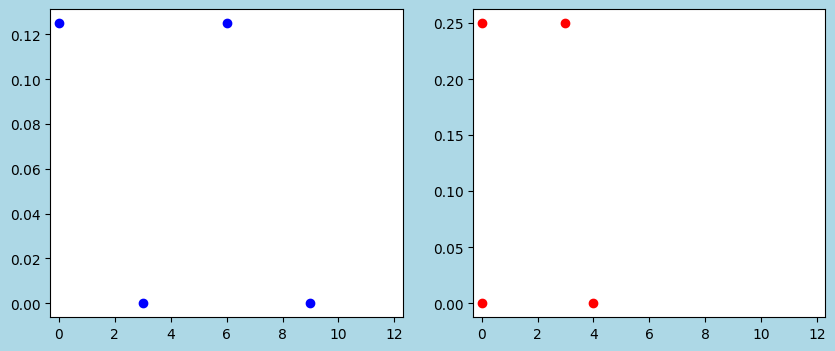

3 6


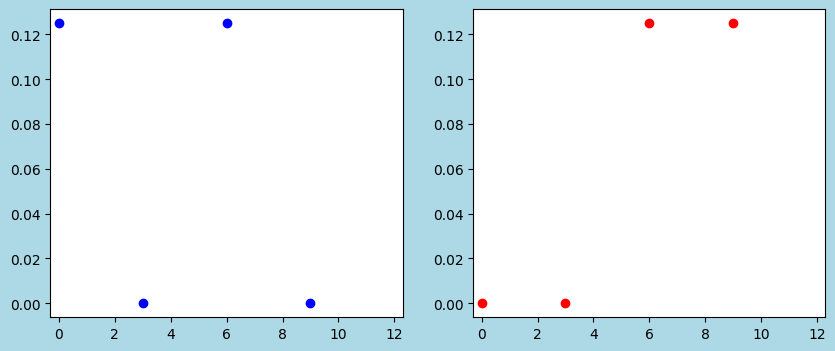

3 8


IndexError: list index out of range

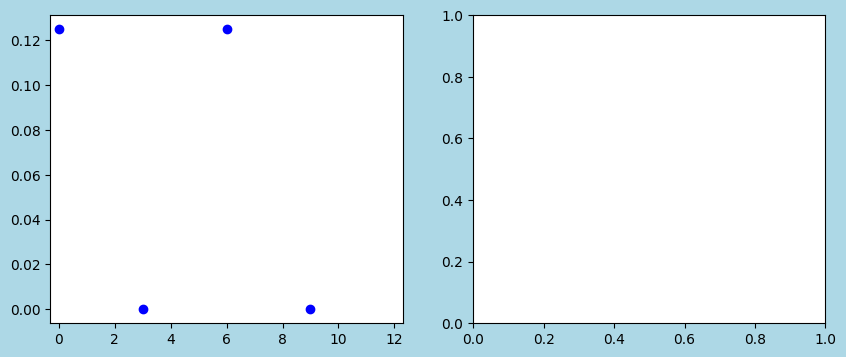

In [146]:
import json
from pprint import pprint
from section_divide import get_section

file_path = "./data/_feature_vector.json"
notes_file_path = "./data/m155_notes-test.json"

with open(file_path) as f:
  data = json.load(f)

# cluster_labels = set(clustering_result)

sections = get_section(notes_file_path)
# pprint(sections[1])
# print(len(sections), len(clustering_result))
label_by_note_count:dict[int,set] = dict()
cnt_by_note_count:dict[int,int] = dict()

note_count_by_label:dict[int,set] = dict()

note4_sections =  list()
note4_sections_idx =  list()

for i,section in enumerate(sections):
  
  if label_by_note_count.get(len(section)) is not None:
    label_by_note_count[len(section)].add(clustering_result[i])
    cnt_by_note_count[len(section)] += 1
  else:
    label_by_note_count[len(section)] = set()
    cnt_by_note_count[len(section)] = 0
  
  if note_count_by_label.get(clustering_result[i]) is not None:
    note_count_by_label[clustering_result[i]].add(len(section))
  else:
    note_count_by_label[clustering_result[i]] = set()
    
  if len(section) == 4:
    note4_sections.append(section)
    note4_sections_idx.append(i)

print("=== ノーツ数が4である区間の数，ノーツ数が4である区間のラベルの数，そのラベル")
print(cnt_by_note_count[4], len(label_by_note_count[4]), label_by_note_count[4])
print("=====")

# print("=== 「ノーツ数が4であるラベル」に属する区間が持つノーツ数")
# for label in label_by_note_count[4]:
#   print(label,note_count_by_label[label])
# print("=====")

import matplotlib.pyplot as plt

# print("===")
for i,idx in enumerate(note4_sections_idx):
  find = False
  for j,jdx in enumerate(note4_sections_idx):
    if clustering_result[idx] == clustering_result[jdx]:
      continue
    
    print(clustering_result[idx], clustering_result[jdx])
    
    fig = plt.figure(figsize = (10,4), facecolor='lightblue')
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    
    xs = [item["x"] for item in note4_sections[i]]
    ys = [item["y"] for item in note4_sections[i]]
    miny = min(ys)
    ys = [y-miny for y in ys]
    ax1.scatter(xs,ys, color="b", label=clustering_result[note4_sections_idx[idx]])
    ax1.set_xlim([-0.3,12.3])
    # ax1.set_ylim(bottom=0)
    
    xs = [item["x"] for item in note4_sections[j]]
    ys = [item["y"] for item in note4_sections[j]]
    miny = min(ys)
    ys = [y-miny for y in ys]
    ax2.scatter(xs,ys,color="r", label=clustering_result[note4_sections_idx[jdx]])
    ax2.set_xlim([-0.3,12.3])

    plt.show()
    
    break
  else:
    continue
  
  break


# pprint(note4_sections[0])
# print("&")
# pprint(note4_sections[1])
# print("=====")
